# Data extraction: NASA 

Data sources are very diverse. Many official sources provide us with raw online data we can directly access with python libraries like [pandas](https://pandas.pydata.org/). We now show a series of examples on retrieving raw __txt__ spreadsheets data from [NASA GISS](https://data.giss.nasa.gov/). For a comprehensive guide on how to load various types of data into pandas dataframes please check [IO tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

In [1]:
# parsing will require extra help
import re

# perform web requests from an url
import requests

## Global Surface Air Temperature Anomaly

Source: [NASA Goddard Institute for Space Studies (GISS) Surface Temperature Analysis](http://data.giss.nasa.gov/gistemp/).


### The data file

- Direct link to the source data file: [http://data.giss.nasa.gov/gistemp/graphs_v3/Fig.A.txt](http://data.giss.nasa.gov/gistemp/graphs_v3/Fig.A.txt)

It contains data from 1880 to 2019 of the change in global average surface air temperature, compared to the average global temperature measured in the period __1951 to 1980__.

An excerpt of the file:

```
Global Surface Air Temperature Anomaly (C) (Base: 1951-1980)
------------------------------------------------------------
 Year  Annual_Mean 5-year_Mean
--------------------------------
 1880     -0.49         *
 1881     -0.47         *
 1882     -0.38     -0.48
 1883     -0.39     -0.48
 1884     -0.67     -0.52
 1885     -0.51     -0.58
...
 2015      0.97      1.01
 2016      1.24      1.05
 2017      1.13         *
 2018      1.05         *
 2019         *         *
```

The years 1885 and 2016 are said to have a global average temperature of **-0.51** and **+1.24** degrees Celsius, respectively, from the average temperature as measured in the period of 1951-1980. The __5-year mean__ of 1884 -- __-0.52__ -- is the rolling average of the annual means for 1882 through 1886.

### Parsing and wrangling the temperature text file
Let's first load the file:

In [2]:
source_data_url_temp_anomaly = 'http://data.giss.nasa.gov/gistemp/graphs_v3/Fig.A.txt'
resp_temp_anomaly = requests.get(source_data_url_temp_anomaly)
resp_temp_anomaly.text

'Global Surface Air Temperature Anomaly (C) (Base: 1951-1980)\n------------------------------------------------------------\n Year  Annual_Mean 5-year_Mean\n--------------------------------\n 1880     -0.47         *\n 1881     -0.45         *\n 1882     -0.36     -0.47\n 1883     -0.38     -0.48\n 1884     -0.67     -0.52\n 1885     -0.54     -0.59\n 1886     -0.67     -0.61\n 1887     -0.71     -0.53\n 1888     -0.48     -0.54\n 1889     -0.23     -0.52\n 1890     -0.59     -0.48\n 1891     -0.58     -0.50\n 1892     -0.52     -0.54\n 1893     -0.56     -0.49\n 1894     -0.43     -0.44\n 1895     -0.36     -0.38\n 1896     -0.32     -0.35\n 1897     -0.22     -0.32\n 1898     -0.40     -0.28\n 1899     -0.32     -0.25\n 1900     -0.16     -0.29\n 1901     -0.17     -0.29\n 1902     -0.38     -0.34\n 1903     -0.44     -0.38\n 1904     -0.56     -0.40\n 1905     -0.36     -0.42\n 1906     -0.24     -0.41\n 1907     -0.53     -0.38\n 1908     -0.38     -0.38\n 1909     -0.40     -0.40\

The raw string is not very useful in its current shape. We need to parse the string in order to work with it. This can be done using regular expressions and `re.findall()`. If you struggle with regular expressions, [this online editor](https://regexr.com/) may help. 

In [3]:
pattern_temp_anomaly     = re.compile(r'^ +(\d{4}) +(-?\d+\.\d+|[*]?) +(-?\d+\.\d+|[*]?)', re.MULTILINE)
data_tuples_temp_anomaly = re.findall(pattern_temp_anomaly, resp_temp_anomaly.text)
data_tuples_temp_anomaly

[('1880', '-0.47', '*'),
 ('1881', '-0.45', '*'),
 ('1882', '-0.36', '-0.47'),
 ('1883', '-0.38', '-0.48'),
 ('1884', '-0.67', '-0.52'),
 ('1885', '-0.54', '-0.59'),
 ('1886', '-0.67', '-0.61'),
 ('1887', '-0.71', '-0.53'),
 ('1888', '-0.48', '-0.54'),
 ('1889', '-0.23', '-0.52'),
 ('1890', '-0.59', '-0.48'),
 ('1891', '-0.58', '-0.50'),
 ('1892', '-0.52', '-0.54'),
 ('1893', '-0.56', '-0.49'),
 ('1894', '-0.43', '-0.44'),
 ('1895', '-0.36', '-0.38'),
 ('1896', '-0.32', '-0.35'),
 ('1897', '-0.22', '-0.32'),
 ('1898', '-0.40', '-0.28'),
 ('1899', '-0.32', '-0.25'),
 ('1900', '-0.16', '-0.29'),
 ('1901', '-0.17', '-0.29'),
 ('1902', '-0.38', '-0.34'),
 ('1903', '-0.44', '-0.38'),
 ('1904', '-0.56', '-0.40'),
 ('1905', '-0.36', '-0.42'),
 ('1906', '-0.24', '-0.41'),
 ('1907', '-0.53', '-0.38'),
 ('1908', '-0.38', '-0.38'),
 ('1909', '-0.40', '-0.40'),
 ('1910', '-0.33', '-0.36'),
 ('1911', '-0.36', '-0.36'),
 ('1912', '-0.34', '-0.29'),
 ('1913', '-0.34', '-0.24'),
 ('1914', '-0.09', '-0

We are now ready to load data into a pandas dataframe. Pay special attention to how we [handle missing data](  https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data) with Pandas.

In [4]:
# import pandas to use pandas DataFrame 
import pandas as pd 
pd.set_option("max_rows", 8)              

# create the dataframe
df_temp_anomaly = pd.DataFrame(data_tuples_temp_anomaly, columns =['Year', 'Annual_Mean', '5-year_Mean']) 

# replace '*' with NaNs
df_temp_anomaly = df_temp_anomaly.replace('*', 'nan')

# use a dictionary of types to convert specific columns 
types_dict_temp_anomaly = {'Year': int, 'Annual_Mean': float, '5-year_Mean': float} 
df_temp_anomaly = df_temp_anomaly.astype(types_dict_temp_anomaly) 

df_temp_anomaly

,Year,Annual_Mean,5-year_Mean
0,1880,-0.47,NaN
1,1881,-0.45,NaN
2,1882,-0.36,-0.47
3,1883,-0.38,-0.48
...,...,...,...
136,2016,1.24,1.05
137,2017,1.13,NaN
138,2018,1.05,NaN
139,2019,NaN,NaN


Finally, let's plot both series using seaborn and matplolib:

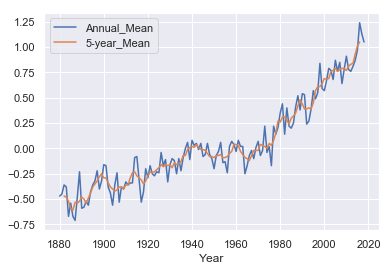

In [5]:
import matplotlib.pyplot as plt  
import seaborn as sns 
%matplotlib inline  
sns.set(style="darkgrid")

df_temp_anomaly.plot.line(x='Year', y=['Annual_Mean','5-year_Mean'])

## NASA CO2 gases

Source: [NASA GISS: Forcings in GISS Climate Model](http://data.giss.nasa.gov/modelforce/ghgases/).

### The data file

- Direct link to the source file: [http://data.giss.nasa.gov/modelforce/ghgases/Fig1A.ext.txt](http://data.giss.nasa.gov/modelforce/ghgases/Fig1A.ext.txt)

The observed global average of carbon dioxide gas in parts-per million.

An excerpt of the file:

```
               Global Mean CO2 Mixing Ratios (ppm): Observations
----------------------------------------------------------------------------------
Data                                     Data
Source  Year  MixR          Yar   MixR   Source Year  MixR          Year  MixR
----------------------------------------------------------------------------------
Ice-    1850  285.2         1900  295.7         1950  311.3         2000  369.64
Core    1851  285.1         1901  296.2         1951  311.8         2001  371.15
Data    1852  285.0         1902  296.6         1952  312.2         2002  373.15
Adjus-  1853  285.0         1903  297.0         1953  312.6         2003  375.64
ted     1854  284.9         1904  297.5         1954  313.2   NOAA/ 2004  377.44
for     1855  285.1         1905  298.0         1955  313.7   ESRL/ 2005  379.46
Global  1856  285.4         1906  298.4         1956  314.3  trends 2006  381.59
Mean    1857  285.6         1907  298.8         1957  314.8  change 2007  383.37
        1858  285.9         1908  299.3  SIO    1958  315.34  added 2008  385.46
        1859  286.1         1909  299.7  Mauna  1959  316.18     to 2009  386.95
        1860  286.4         1910  300.1  Loa    1960  317.07   2003 2010  389.21
        1861  286.6         1911  300.6    &    1961  317.73   data 2011  391.15
        1862  286.7         1912  301.0  South  1962  318.43
        1863  286.8         1913  301.3  Pole   1963  319.08
        1864  286.9         1914  301.4  Adjus- 1964  319.65
        1865  287.1         1915  301.6  ted    1965  320.23
        1866  287.2         1916  302.0  for    1966  321.59
        1867  287.3         1917  302.4  Global 1967  322.31
        1868  287.4         1918  302.8  Mean   1968  323.04
        1869  287.5         1919  303.0         1969  324.23

```



Notice that [the data file](data/climate/raw/nasa-ghgases-fig1A.ext.txt) contains two sections: *Observations*, and *Future Scenarios*: 

```
             Global Mean CO2 Mixing Ratio (ppm): Future Scenarios
----------------------------------------------------------------------------------
           Alternative Scenario                 2 Degree C Scenario
        Year  MixR      Year  MixR          Year  MixR      Year  MixR
----------------------------------------------------------------------------------
        2000  370.0     2050  445.0         2000  370.0     2050  486.2
        2001  371.7     2051  446.2         2001  371.7     2051  489.2
        2002  373.4     2052  447.4         2002  373.4     2052  492.1
        2003  375.1     2053  448.5         2003  375.1     2053  494.9
```

Let's asume we just want to wrangle only the data _before_ the future scenarios section:

In [6]:
# read the gases data to file
source_data_url_co2 = 'http://data.giss.nasa.gov/modelforce/ghgases/Fig1A.ext.txt'
resp_co2 = requests.get(source_data_url_co2)
txt_co2 = resp_co2.text
txt_co2

'               Global Mean CO2 Mixing Ratios (ppm): Observations\n----------------------------------------------------------------------------------\nData                                     Data\nSource  Year  MixR          Yar   MixR   Source Year  MixR          Year  MixR\n----------------------------------------------------------------------------------\nIce-    1850  285.2         1900  295.7         1950  311.3         2000  369.64\nCore    1851  285.1         1901  296.2         1951  311.8         2001  371.15\nData    1852  285.0         1902  296.6         1952  312.2         2002  373.15\nAdjus-  1853  285.0         1903  297.0         1953  312.6         2003  375.64\nted     1854  284.9         1904  297.5         1954  313.2   NOAA/ 2004  377.44\nfor     1855  285.1         1905  298.0         1955  313.7   ESRL/ 2005  379.46\nGlobal  1856  285.4         1906  298.4         1956  314.3  trends 2006  381.59\nMean    1857  285.6         1907  298.8         1957  314.8  cha

We count the number of lines in the file before *Future Scenarios* and create an excerpt of the full string:

In [7]:
# Count lines
stop_line_num = [x.strip() for x in txt_co2.splitlines()].index('Global Mean CO2 Mixing Ratio (ppm): Future Scenarios')
print('Future Scenarios starts at line {} '.format(stop_line_num))

Future Scenarios starts at line 58 


In [8]:
# get the lines before Future Scenarios section
excerpt = "\n".join(txt_co2.splitlines()[:stop_line_num])
excerpt

'               Global Mean CO2 Mixing Ratios (ppm): Observations\n----------------------------------------------------------------------------------\nData                                     Data\nSource  Year  MixR          Yar   MixR   Source Year  MixR          Year  MixR\n----------------------------------------------------------------------------------\nIce-    1850  285.2         1900  295.7         1950  311.3         2000  369.64\nCore    1851  285.1         1901  296.2         1951  311.8         2001  371.15\nData    1852  285.0         1902  296.6         1952  312.2         2002  373.15\nAdjus-  1853  285.0         1903  297.0         1953  312.6         2003  375.64\nted     1854  284.9         1904  297.5         1954  313.2   NOAA/ 2004  377.44\nfor     1855  285.1         1905  298.0         1955  313.7   ESRL/ 2005  379.46\nGlobal  1856  285.4         1906  298.4         1956  314.3  trends 2006  381.59\nMean    1857  285.6         1907  298.8         1957  314.8  cha

In [9]:
# get the tuples
pattern_co2     = re.compile(r'(\b\d{4})  (\d{3}\.\d{1,2}\b)')
data_tuples_co2 = re.findall(pattern_co2, excerpt)
data_tuples_co2

[('1850', '285.2'),
 ('1900', '295.7'),
 ('1950', '311.3'),
 ('2000', '369.64'),
 ('1851', '285.1'),
 ('1901', '296.2'),
 ('1951', '311.8'),
 ('2001', '371.15'),
 ('1852', '285.0'),
 ('1902', '296.6'),
 ('1952', '312.2'),
 ('2002', '373.15'),
 ('1853', '285.0'),
 ('1903', '297.0'),
 ('1953', '312.6'),
 ('2003', '375.64'),
 ('1854', '284.9'),
 ('1904', '297.5'),
 ('1954', '313.2'),
 ('2004', '377.44'),
 ('1855', '285.1'),
 ('1905', '298.0'),
 ('1955', '313.7'),
 ('2005', '379.46'),
 ('1856', '285.4'),
 ('1906', '298.4'),
 ('1956', '314.3'),
 ('2006', '381.59'),
 ('1857', '285.6'),
 ('1907', '298.8'),
 ('1957', '314.8'),
 ('2007', '383.37'),
 ('1858', '285.9'),
 ('1908', '299.3'),
 ('1958', '315.34'),
 ('2008', '385.46'),
 ('1859', '286.1'),
 ('1909', '299.7'),
 ('1959', '316.18'),
 ('2009', '386.95'),
 ('1860', '286.4'),
 ('1910', '300.1'),
 ('1960', '317.07'),
 ('2010', '389.21'),
 ('1861', '286.6'),
 ('1911', '300.6'),
 ('1961', '317.73'),
 ('2011', '391.15'),
 ('1862', '286.7'),
 ('1

Now we are ready to parse the file into a dataframe:

In [10]:
# create the dataframe
df_co2 = pd.DataFrame(data_tuples_co2, columns =['Year', 'MixR']) 

# use a dictionary of types to convert specific columns 
types_dict_co2 = {'Year': int, 'MixR': float} 
df_co2 = df_co2.astype(types_dict_co2) 

# sort by year
df_co2 = df_co2.sort_values(by=['Year'])

df_co2

,Year,MixR
0,1850,285.20
4,1851,285.10
8,1852,285.00
12,1853,285.00
...,...,...
35,2008,385.46
39,2009,386.95
43,2010,389.21
47,2011,391.15


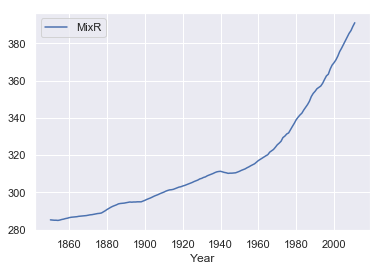

In [11]:
# And plot
df_co2.plot.line(x='Year', y='MixR')

We can combine data from both files, temperature anomalies and co2 levels into a single dataframe using [df.merge](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html):

In [12]:
# we merge both dataframes using Year as the merging key
df_temp_anomaly_co2 = pd.merge(df_co2, df_temp_anomaly, on='Year')

# drop the 5-year_Mean column
df_temp_anomaly_co2 = df_temp_anomaly_co2.drop(columns=['5-year_Mean'])

# set Year as the index
df_temp_anomaly_co2 = df_temp_anomaly_co2.set_index('Year')
df_temp_anomaly_co2

,MixR,Annual_Mean
Year,,
1880,290.80,-0.47
1881,291.40,-0.45
1882,292.00,-0.36
1883,292.50,-0.38
...,...,...
2008,385.46,0.64
2009,386.95,0.78
2010,389.21,0.91
2011,391.15,0.78


Finally, we can quickly visualize the relations between both variables __MixR__ and __Annual_Mean__ with [seaborn.pariplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

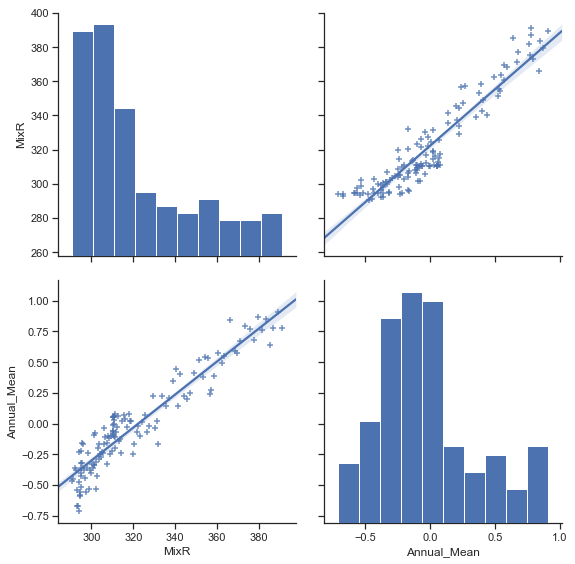

In [13]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_temp_anomaly_co2, kind="reg", markers="+",height=4)